In [5]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [1]:
# load the files
houselist = glob.glob('HousesDataset/*.jpg')

image_data = []
for fname in houselist:
    image_name = fname.split('/')[1].split('.')[0]
    image_data.append((image_name, np.array(Image.open(fname))))
    pass

text_data = pd.read_csv('HousesDataset/HousesInfo.txt', sep=' ',
                        names=["nBeds", "nbaths", "area", "zipcode", "price"])

In [2]:
text_data.head()

,nBeds,nbaths,area,zipcode,price
0,4,4.0,4053,85255,869500.0
1,4,3.0,3343,36372,865200.0
2,3,4.0,3923,85266,889000.0
3,5,5.0,4022,85262,910000.0
4,3,4.0,4116,85266,971226.0


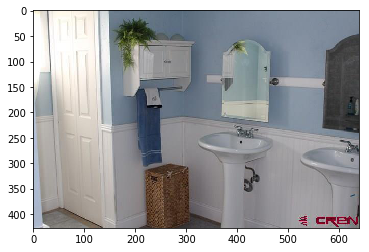

In [13]:
plt.imshow(image_data[0][1])

In [22]:
text_data.columns

Int64Index([0], dtype='int64')